In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import os


In [10]:
csv_fpath = os.path.expanduser('~/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')
CarData = pd.read_csv(csv_fpath)
print(CarData.dtypes)
print(CarData.shape)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [8]:
CarData.head(50)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,Unspecified,NaN,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Unspecified,NaN,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,Unspecified,NaN,NaN,NaN,4285412,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,Unspecified,NaN,NaN,NaN,4284387,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4289056,Sedan,Sedan,NaN,NaN,NaN
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4287390,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,Unspecified,NaN,NaN,NaN,4281172,Sedan,4 dr sedan,NaN,NaN,NaN


In [67]:
CarData["BOROUGH"].value_counts()

BROOKLYN         361640
QUEENS           310684
MANHATTAN        276292
BRONX            163233
STATEN ISLAND     49531
Name: BOROUGH, dtype: int64

In [68]:
CarData["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

Unspecified                       606214
Driver Inattention/Distraction    315718
Failure to Yield Right-of-Way      95974
Following Too Closely              85142
Backing Unsafely                   64128
                                   ...  
Shoulders Defective/Improper          72
Windshield Inadequate                 69
Texting                               37
Listening/Using Headphones            18
1                                     10
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 61, dtype: int64

In [69]:
CarData["VEHICLE TYPE CODE 1"].value_counts()

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  184252
Station Wagon/Sport Utility Vehicle    151311
TAXI                                    50670
                                        ...  
dirt                                        1
99999                                       1
Cargo                                       1
NYC a                                       1
Wheel                                       1
Name: VEHICLE TYPE CODE 1, Length: 727, dtype: int64

In [56]:
feature_col = CarData.columns[4]
resp_col = CarData.columns[11]

X = CarData[feature_col].copy()
y = CarData[resp_col].copy()

In [57]:
X=X>0
y=y>0
X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

In [58]:
linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.00126273]
[('L', array([-0.0001516]))]
R^2:  2.172045456383387e-06
MSE:  0.0011282438580946916


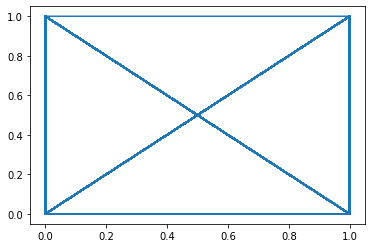

In [60]:
CarPlot = plt.plot(X,y)
plt.show()

In [76]:
CarDataByBorough = pd.get_dummies(CarData, columns=["BOROUGH"])
CarDataByBorough.head(70)

,CRASH DATE,CRASH TIME,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
0,01/21/2020,9:00,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,0.0,...,Sedan,Sedan,NaN,NaN,NaN,0,0,0,0,0
1,02/16/2020,19:20,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,0.0,...,AMBUL,AMBUL,NaN,NaN,NaN,0,0,0,1,0
2,01/28/2020,5:44,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,0.0,...,Taxi,NaN,NaN,NaN,NaN,0,0,0,0,0
3,02/18/2020,9:00,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,0.0,...,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,0,1,0,0,0
4,01/21/2020,0:00,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,0.0,...,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,01/21/2020,15:00,11367,40.731900,-73.824480,POINT (-73.82448 40.7319),NaN,NaN,68-54 MAIN STREET,0.0,...,Sedan,Sedan,NaN,NaN,NaN,0,0,0,1,0
66,02/13/2020,10:00,NaN,40.644073,-74.077774,POINT (-74.077774 40.644073),WALL STREET,NaN,NaN,0.0,...,Sedan,NaN,NaN,NaN,NaN,0,0,0,0,0
67,02/15/2020,8:24,11368,40.753944,-73.859590,POINT (-73.85959 40.753944),NaN,NaN,108-39 37 AVENUE,0.0,...,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN,0,0,0,1,0
68,01/30/2020,12:52,NaN,NaN,NaN,NaN,TILLOTSON AVENUE,CONNER STREET,NaN,0.0,...,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,0,0,0,0,0


In [80]:
CarData['BOROUGH'].unique()

array([nan, 'QUEENS', 'BROOKLYN', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'],
      dtype=object)

In [16]:
def borough_to_numeric(x):
    if x=='QUEENS':
        return 1
    if x=='BROOKLYN':
        return 2
    if x=='MANHATTAN':
        return 3
    if x=='BRONX':
        return 4
    if x=='STATEN ISLAND':
        return 5
    else:
        return 0

In [17]:
CarData['borough_num'] = CarData['BOROUGH'].apply(borough_to_numeric)
CarData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,time_num,borough_num
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN,0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN,1,1
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN,0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,0,2
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,0,1


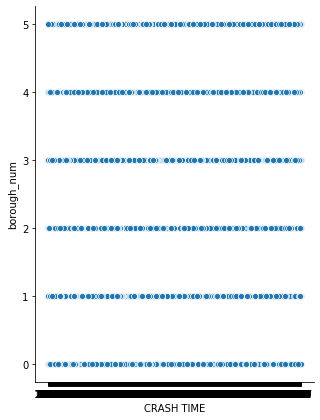

In [18]:
sns.pairplot(CarData,x_vars=["CRASH TIME"],y_vars="borough_num", height=6, aspect=0.8)

In [24]:
def time_to_day_night(x):
    h,m = x.split(':')
    h = int(h)
    m = int(m)
    if h == 1:
        return 1
    if h == 2:
        return 2
    if h == 3:
        return 3
    if h == 4:
        return 4
    if h == 5:
        return 5
    if h == 6:
        return 6
    if h == 7:
        return 7
    if h == 8:
        return 8
    if h == 9:
        return 9
    if h == 10:
        return 10
    if h == 11:
        return 11
    if h == 12:
        return 12
    if h == 13:
        return 13
    if h == 14:
        return 14
    if h == 15:
        return 15
    if h == 16:
        return 16
    if h == 17:
        return 17
    if h == 18:
        return 18
    if h == 19:
        return 19
    if h == 20:
        return 20
    if h == 21:
        return 21
    if h == 22:
        return 22
    if h == 23:
        return 23
    if h == 24:
        return 24
    else:
        return 0
    
CarData['time_num'] = CarData['CRASH TIME'].apply(time_to_day_night)
CarData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,time_num,borough_num
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN,9,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN,19,1
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN,5,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,9,2
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,0,1


In [54]:
def injured_to_binary(x):
        if x>= 1:
            return 1
        else:
            return 0
CarData['injuries'] = CarData['NUMBER OF PERSONS INJURED'].apply(injured_to_binary)
CarData.head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,time_num,borough_num,injuries
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN,9,0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN,19,1,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,4279961,Taxi,NaN,NaN,NaN,NaN,5,0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,9,2,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,0,1,0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,NaN,4285412,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,21,2,1
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,NaN,4284387,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,8,1,0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,NaN,4289056,Sedan,Sedan,NaN,NaN,NaN,18,0,0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,NaN,4287390,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,10,0,0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,NaN,4281172,Sedan,4 dr sedan,NaN,NaN,NaN,20,2,0


In [55]:
print(CarData.dtypes)
print(CarData.shape)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [58]:
B = CarData[CarData.columns.tolist()[29:31]].dropna()
K = CarData['injuries'].dropna()
pred = np.array(B)
resp = np.array(K)
#pred = B.values.reshape(-1,1)
#resp = K.values.reshape(-1,1)


In [59]:
X = pred
y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,y)
print("Accuracy without splitting data:",metrics.accuracy_score(y,logreg_all.predict(X)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy without splitting data: 0.8064345050753673
